###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from [this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/The Finite-Difference Method/fd_taylor_operators_advanced.ipynb) by Heiner Igel ([@heinerigel](https://github.com/heinerigel)), Lion Krischer ([@krischer](https://github.com/krischer)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Improving the accuracy of FD operators based on Taylor series expansion

After estimating the accuracy of FD operators by calculating the remainders of Taylor series expansions, the next obvious question is how could we improve the accuracy of FD approximations.

## Estimation of FD operators by Taylor series expansion

In [this lession](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/03_Intro_finite_differences/1_fd_intro.ipynb), we introduced the 3-point FD approximation to the second derivative of a function:

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx \frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2} \nonumber
\end{equation}

from a Taylor series expansion. Here, I want to introduce a more systematic approach to derive this operator, which is required for a later improvement of the FD operator accuracy.

The Taylor expansion of $f(x + dx)$ around $x$ is defined as 

$$
f(x+dx)=\sum_{n=0}^\infty \frac{f^{(n)}(x)}{n!}dx^{n}  
$$

Finite-difference operators can be calculated by seeking weights (here: $a$, $b$, $c$) with which function values have to be multiplied to obtain an interpolation or a derivative. 

### Example: second derivative

We want to approximate the second derivative of a function based on function values at the points $f(x+dx)$, $f(x)$ and $f(x-dx)$:

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+dx) + b ~ f(x) + c ~ f(x-dx)
\end{equation}

The individual terms in the derivative can be expressed by the following Taylor series expansion up to the quadratic term:

$$
\begin{align}
a ~ f(x + dx) & \ = \ a ~ \left[ ~  f(x) +  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2!}  \frac{\partial^2 f(x)}{\partial x^2} dx^2   + \dotsc  ~ \right] \nonumber\\
b ~ f(x) & \  = \ b ~ \left[ ~  f(x)  ~ \right] \nonumber\\
c ~ f(x - dx) & \ = \ c ~ \left[ ~  f(x) -  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2!}  \frac{\partial^2 f(x)}{\partial x^2} dx^2   - \dotsc  ~ \right] \nonumber
\end{align}
$$

Inserting these approximations into eq. (1) and sorting of the terms leads to 

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+dx) + b ~ f(x) + c ~ f(x-dx) \approx \nonumber
\end{equation}
$$
\begin{align}
f(x) ~ \biggl[&a  ~~+~~            ~~~~b           &+~~  c\biggr] \notag\\
+dx ~ \frac{\partial f(x)}{\partial x} ~ \biggl[&a  ~~\phantom{+}~~ \phantom{b}  &-~~  c\biggr] \notag\\
+\frac{dx^2}{2!} ~ \frac{\partial^2 f(x)}{\partial x^2} ~ \biggl[&a  ~~\phantom{+}~~ \phantom{b}  &+~~  c\biggr] \notag
\end{align}
$$

The RHS of this equation can only be an approximation to $\frac{\partial^2 f(x)}{\partial x^2}$, if the following conditions are fulfilled:

$$
\begin{align}
&a  ~~+~~            ~~~~b           &+~~  c & = & 0 \notag\\
&a  ~~\phantom{+}~~ \phantom{b}  &-~~  c & = & 0 \notag\\
&a  ~~\phantom{+}~~ \phantom{b}  &+~~  c & = & \frac{2!}{\mathrm{d}x^2}\notag
\end{align}
$$

This system of linear equations can be expressed in matrix form as:

$$
\begin{pmatrix}
  1 & 1 & 1 \\
  1 & 0 & -1 \\
  1 & 0 & 1
 \end{pmatrix}
\begin{pmatrix}
  a\\
 b \\
 c
 \end{pmatrix}
 =\begin{pmatrix}
  0\\
 0 \\
 \frac{2!}{dx^2}
 \end{pmatrix}
$$

or 

\begin{equation}
\mathbf{Ax ~= ~s}\nonumber
\end{equation}

with the system matrix $\mathbf{A}$, the vector $\mathbf{x}$ containing the desired FD weights $a,\; b,\; c$ and the solution vector $\mathbf{s}$. Formally, the FD operator weights can be estimated by matrix inversion:

\begin{equation}
\mathbf{x ~= A^{-1}~s}\nonumber
\end{equation}

Let's try to estimate the FD weighting coefficients by symbolic matrix inversion with `SymPy`:

In [2]:
# import SymPy libraries
from sympy import *

In [3]:
# Define symbols
a, b, c, dx = symbols('a b c dx')

# In SymPy we define the matrix equation by a matrix consisting of the 
# system matrix A and an additional column defining the solution vector s
system = Matrix(([1, 1, 1, 0], [1, 0, -1, 0], [1, 0, 1, 2/dx**2]))

# Symbolic solution of the linear system can be easily obtained by linsolve
linsolve(system, (a, b, c))

{(dx**(-2), -2/dx**2, dx**(-2))}

So the resulting weighting coefficients are:

$$
\begin{pmatrix}
a \\
b\\
c
\end{pmatrix}
=\begin{pmatrix}
\frac{1}{\mathrm{d}x^2} \\
-\frac{2}{\mathrm{d}x^2} \\
\frac{1}{\mathrm{d}x^2}
\end{pmatrix}
$$

Inserting the coefficients $a,\; b,\; c$ in eq. (1) leads to 

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx \frac{f(x+dx)-2f(x)+f(x-dx)}{dx^2}, \nonumber
\end{equation}

which is the well known 3-point operator for the 2nd derivative.

## Improving the accuracy of the 2nd derivative FD approximation

We can use the above approach to estimate higher order and therefore more accurate FD operators. Let's assume we want to approximate the second derivative by a 5- instead of a 3-point operator, at the points $f(x+2dx)$, $f(x+dx)$, $f(x)$, $f(x-dx)$ and $f(x-2dx)$:

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+2dx) + b ~ f(x+dx) + c ~ f(x) + d ~ f(x-dx) + e ~ f(x-2dx) \notag
\end{equation}

To solve for the 5 unknown FD weights, we have to expand 5 terms of the Taylor series, which leads to a higher error order and therefore a more accurate FD operator compared to the 3-point operator. The resulting Taylor series expansions are:

$$
\begin{align}
a ~ f(x + 2dx) & \ = \ a ~ \left[ ~  f(x) +  2 \frac{\partial f(x)}{\partial x} dx +  \frac{4}{2}  \frac{\partial^2 f(x)}{\partial x^2} dx^2 +  \frac{8}{6}  \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{16}{24}  \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber\\
b ~ f(x + dx) & \ = \ b ~ \left[ ~  f(x) +  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2} \frac{\partial^2 f(x)}{\partial x^2} dx^2 +  \frac{1}{6} \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{1}{24}  \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber\\
c ~ f(x) & \  = \ c ~ \left[ ~  f(x)  ~ \right] \nonumber\\
d ~ f(x - dx) & \ = \ d ~ \left[ ~  f(x) -  \frac{\partial f(x)}{\partial x} dx +  \frac{1}{2} \frac{\partial^2 f(x)}{\partial x^2} dx^2 -  \frac{1}{6} \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{1}{24}  \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber\\
e ~ f(x - 2dx) & \ = \ e ~ \left[ ~  f(x) -  2 \frac{\partial f(x)}{\partial x} dx +  \frac{4}{2}  \frac{\partial^2 f(x)}{\partial x^2} dx^2 -  \frac{8}{6} \frac{\partial^3 f(x)}{\partial x^3} dx^3 +  \frac{16}{24} \frac{\partial^4 f(x)}{\partial x^4} dx^4   + \dotsc  ~ \right] \nonumber
\end{align}
$$

Similar to the 3-point operator, we insert the terms into the 5-point FD approximation and sort the terms

\begin{equation}
\frac{\partial^2 f(x)}{\partial x^2} \approx a ~ f(x+2dx) + b ~ f(x+dx) + c ~ f(x) + d ~ f(x-dx) + e ~ f(x-2dx)  \approx \nonumber
\end{equation}
$$
\begin{align}
f(x) ~ \biggl[&a  ~~+~~   b   ~~+~~ c ~~+~~  d ~~+~~  e~~           \biggr] \notag\\
+dx ~ \frac{\partial f(x)}{\partial x} ~ \biggl[&2a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  2e~~           \biggr] \notag\\
+\frac{dx^2}{2} ~ \frac{\partial^2 f(x)}{\partial x^2} ~ \biggl[&4a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  4e~~           \biggr] \notag\\
+\frac{dx^3}{6} ~ \frac{\partial^3 f(x)}{\partial x^3} ~ \biggl[&8a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  8e~~           \biggr] \notag\\
+\frac{dx^4}{24} ~ \frac{\partial^4 f(x)}{\partial x^4} ~ \biggl[&16a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  16e~~           \biggr] \notag\\
\end{align}
$$

leading to the following conditions:

$$
\begin{align}
\biggl[&a  ~~+~~   b   ~~+~~ c ~~+~~  d ~~+~~  e~~           \biggr] ~=~ 0 \notag\\
\biggl[&2a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  2e~~           \biggr] ~=~ 0 \notag\\
\biggl[&4a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  4e~~           \biggr] ~=~ \frac{2}{dx^2} \notag\\
\biggl[&8a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~-~~  d ~~-~~  8e~~           \biggr] ~=~ 0\notag\\
\biggl[&16a  ~~+~~   b   ~~\phantom{+}~~ \phantom{c} ~~+~~  d ~~+~~  16e~~           \biggr] ~=~ 0\notag\\
\end{align}
$$

or as matrix equation:

$$
\begin{pmatrix}
  1 & 1 & 1 & 1 & 1 \\
  2 & 1 & 0 & -1 & -2 \\
  4 & 1 & 0 & 1 & 4 \\
  8 & 1 & 0 & -1 & -8 \\
  16 & 1 & 0 & 1 & 16 \\
 \end{pmatrix}
\begin{pmatrix}
  a\\
 b \\
 c \\
 d \\
 e \\
 \end{pmatrix}
 =\begin{pmatrix}
  0\\
 0 \\
 \frac{2!}{dx^2} \\
 0 \\
 0
 \end{pmatrix}
 \nonumber
$$

In [4]:
# Define symbols
a, b, c, d, e, dx = symbols('a b c d e dx')

# In SymPy we define the matrix equation by a matrix consisting of the 
# system matrix A and an additional column defining the solution vector s
system = Matrix(([1, 1, 1, 1, 1, 0], [2, 1, 0, -1, -2, 0], [4, 1, 0, 1, 4, 2/dx**2], [8, 1, 0, -1, -8, 0], [16, 1, 0, 1, 16, 0]))

# Symbolic solution of the linear system can be easily obtained by linsolve
linsolve(system, (a, b, c, d, e))

{(-1/(12*dx**2), 4/(3*dx**2), -5/(2*dx**2), 4/(3*dx**2), -1/(12*dx**2))}

So the resulting weighting coefficients for the 5-point FD operator are:

$$
\begin{pmatrix}
a \\
b\\
c\\
d\\
e
\end{pmatrix}
=\begin{pmatrix}
-\frac{1}{12\mathrm{d}x^2} \\
 \frac{4}{3\mathrm{d}x^2} \\
-\frac{5}{2\mathrm{d}x^2}\\
\frac{4}{3\mathrm{d}x^2}\\
-\frac{1}{12\mathrm{d}x^2}
\end{pmatrix}
$$

##### Exercise

To investigate the effect of the 5-point operator on the finite-difference based solution of the 1D acoustic wave equation:

* Implement the 5-point operator to approximate the spatial 2nd derivative in the 1D acoustic FD modelling code. Add an option to use the 3-point operator
* Compare the impact of the 3-point and 5-point operators on the modelling result by plotting the analytical seismograms $d^{analyt}$ and FD seismograms $d^{FD}$ as well as their differences, respectively. Use $v_0 = 333\; m/s$, $dx = 2\; m$ and $dt = 1\;ms$ as modelling parameters. Quantify the data misfit also in terms of the L2-norm of the data residuals:
\begin{equation}
E = \frac{1}{2}\sum_{i=0}^{nt}\biggl(d^{FD}_i-d^{analyt}_i\biggr)^2\nonumber
\end{equation}
where $nt$ denotes the number of time samples
* Benchmark and compare the runtimes of the 3-point and 5-point operator by using the magic function `%timeit` and the same spatio-temporal model discretizations $dx$ and $dt$ in order to achieve comparable results
* Estimate the factor $\zeta$ in the Courant criterion:
\begin{equation}
dt \le \frac{dx}{\zeta v_{max}}\nonumber
\end{equation}
for the 5-point operator by forward modelling. Start with the modelling parameters $v_{max} = 333\; m/s$ and $dx = 0.5\; m$ and the Courant criterion for the 3pt operator ($\zeta=1$). Vary $\zeta$ during different forward modelling runs, until you resolved the transition between stable and unstable FD solutions.

In [5]:
# Import Libraries 
# ----------------
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

# Ignore Warning Messages
# -----------------------
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Definition of modelling parameters
# ----------------------------------
xmax = 500 # maximum spatial extension of the 1D model (m)
dx   = 0.5 # grid point distance in x-direction

tmax = 1.001   # maximum recording time of the seismogram (s)
dt   = 0.0010  # time step

vp0  = 333.   # P-wave speed in medium (m/s)

# acquisition geometry
xr = 365.0 # receiver position (m)
xsrc = 249.5 # source position (m)

f0   = 25. # dominant frequency of the source (Hz)
t0   = 4. / f0 # source time shift (s)

In [7]:
# 1D Wave Propagation (Finite Difference Solution) 
# ------------------------------------------------
def FD_1D_acoustic(dt,dx,op):
        
    nx = (int)(xmax/dx) # number of grid points in x-direction        
    nt = (int)(tmax/dt) # maximum number of time steps            
    
    ir = (int)(xr/dx)      # receiver location in grid in x-direction    
    isrc = (int)(xsrc/dx)  # source location in grid in x-direction

    # Source time function (Gaussian)
    # -------------------------------
    src  = np.zeros(nt + 1)
    time = np.linspace(0 * dt, nt * dt, nt)

    # 1st derivative of a Gaussian
    src  = -2. * (time - t0) * (f0 ** 2) * (np.exp(- (f0 ** 2) * (time - t0) ** 2))

    # Analytical solution
    # -------------------
    G    = time * 0.

    # Initialize coordinates
    # ----------------------
    x    = np.arange(nx)
    x    = x * dx       # coordinate in x-direction

    for it in range(nt): # Calculate Green's function (Heaviside function)
        if (time[it] - np.abs(x[ir] - x[isrc]) / vp0) >= 0:
            G[it] = 1. / (2 * vp0)
    seis_ana   = np.convolve(G, src * dt)
    seis_ana   = seis_ana[0:nt]
    
    # Initialize empty pressure arrays
    # --------------------------------
    p    = np.zeros(nx) # p at time n (now)
    pold = np.zeros(nx) # p at time n-1 (past)
    pnew = np.zeros(nx) # p at time n+1 (present)
    d2px = np.zeros(nx) # 2nd space derivative of p

    # Initialize model (assume homogeneous model)
    # -------------------------------------------
    vp    = np.zeros(nx)
    vp    = vp + vp0       # initialize wave velocity in model

    # Initialize empty seismogram
    # ---------------------------
    seis = np.zeros(nt)    
    
    # Calculate Partial Derivatives
    # -----------------------------
    for it in range(nt):
    
        # FD approximation of spatial derivative by 3 point operator
        if(op==3):
            for i in range(1, nx - 1):
                d2px[i] = (p[i + 1] - 2 * p[i] + p[i - 1]) / dx ** 2
        
        # ADD YOUR 5-POINT FD OPERATOR HERE 
        #if(op==5):
                
        # Time Extrapolation
        # ------------------
        pnew = 2 * p - pold + vp ** 2 * dt ** 2 * d2px

        # Add Source Term at isrc
        # -----------------------
        # Absolute pressure w.r.t analytical solution
        pnew[isrc] = pnew[isrc] + src[it] / dx * dt ** 2
                
        # Remap Time Levels
        # -----------------
        pold, p = p, pnew
    
        # Output of Seismogram
        # --------------------
        seis[it] = p[ir]
        
    return time, seis, seis_ana

In [8]:
dx = 2.0 # grid point distance in x-direction (m)
dt = 0.0010  # time step (s)

# run FD code with 3-point operator
op = 3 # use 3-point operator
time, seis_3pt, seis_ana = FD_1D_acoustic(dt,dx,op)

# run FD code with 5-point operator
op = 5 # use 5-point operator
# RUN FD CODE WITH 5-POINT OPERATOR HERE!

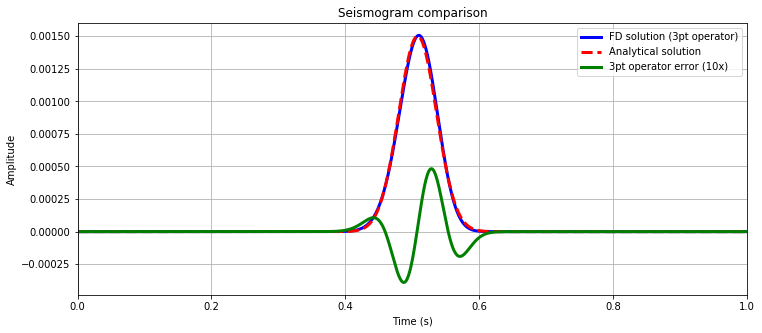

E_3pt =  9.693346990256778e-08


In [9]:
# Compare FD Seismogram with analytical solution
# ---------------------------------------------- 
# Define figure size
rcParams['figure.figsize'] = 12, 5

# plot solution of 3-point FD operator
plt.plot(time, seis_3pt, 'b-',lw=3,label="FD solution (3pt operator)")

# PLOT SOLUTION OF 5-POINT FD OPERATOR HERE!

# plot analytical solution
Analy_seis = plt.plot(time,seis_ana,'r--',lw=3,label="Analytical solution") 

# plot difference between analytical and 3pt operator FD solution
plt.plot(time, 10*(seis_3pt-seis_ana), 'g-',lw=3,label="3pt operator error (10x)")

# PLOT DIFFERENCE BETWEEN ANALYTICAL AND 5PT OPERATOR SOLUTION HERE!

plt.xlim(time[0], time[-1])
plt.title('Seismogram comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

# Calculate L2-norm of the data residuals between FD and analytical solution
# 3-point operator
E_3pt = np.sum((seis_3pt-seis_ana)**2)
print("E_3pt = ", E_3pt)

# ADD L2-NORM for 5-POINT OPERATOR HERE!

In [10]:
dx = 2.0 # grid point distance in x-direction
dt = 0.0010  # time step

# Benchmark runtime of 3pt-FD code
op = 3 # use 3-point operator
%timeit time, seis_3pt, seis_ana = FD_1D_acoustic(dt,dx,op)

157 ms ± 614 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
# BENCHMARK RUNTIME OF 5PT-FD CODE HERE!

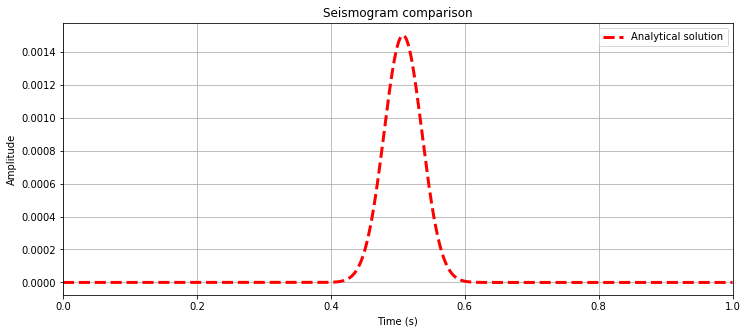

In [12]:
# Estimate Courant criterion for 5pt-FD operator
# ----------------------------------------------

dx = 0.5 # grid point distance in x-direction
zeta = 1.0
dt = dx / (zeta*vp0)
op = 5 # use 5-point operator
# RUN FD CODE WITH 5-POINT OPERATOR HERE!

# PLOT SOLUTION OF 5-POINT FD OPERATOR HERE!

# plot analytical solution
Analy_seis = plt.plot(time,seis_ana,'r--',lw=3,label="Analytical solution") 

plt.xlim(time[0], time[-1])
plt.title('Seismogram comparison')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

## What we learned:

* Use the Taylor series to calculate finite-difference operators
* How to derive high-order finite-difference operators
* Derivation and application of spatial 5-point operator to approximate the spatial second derivative in the 1D acoustic wave equation